|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif"> |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|

### Section18.5

<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-18-Section-18-5.png'>



In [46]:
#
# Pierre Proulx
#
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline

In [51]:
# Paramètres, variables et fonctions

eta=sp.symbols('eta')       # eta est égal à x/(sp.sqrt(4*DAB*z/Vmax))                                                     
phi=sp.Function('phi')(eta) # phi est Ca/Ca0
Ca,Ca0=sp.symbols('C_A C_A0')

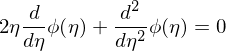

In [52]:
#
# La solution est similaire à celle du chapitre 4, 
# on utilisera d'abord cette solution ensuite on insèrera les
# variables voulues
#
eq1=sp.Eq(phi.diff(eta,eta)+2*eta*phi.diff(eta),0)
display(eq1)
phi=sp.dsolve(eq1)
display(phi)

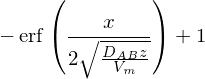

In [49]:
cl1=sp.Eq(phi.rhs.subs(eta,0)-1,0)
cl2=sp.Eq(phi.rhs.subs(eta,sp.oo),0)
constantes=sp.solve((cl1,cl2),sp.symbols('C1 C2'),dict=True)
display(constantes)
phi=phi.subs(constantes[0])
display(phi)
etaCh18=x/(sp.sqrt(4*DAB*z/Vmax))
phi=phi.subs(eta,etaCh18)
display(phi.rhs)

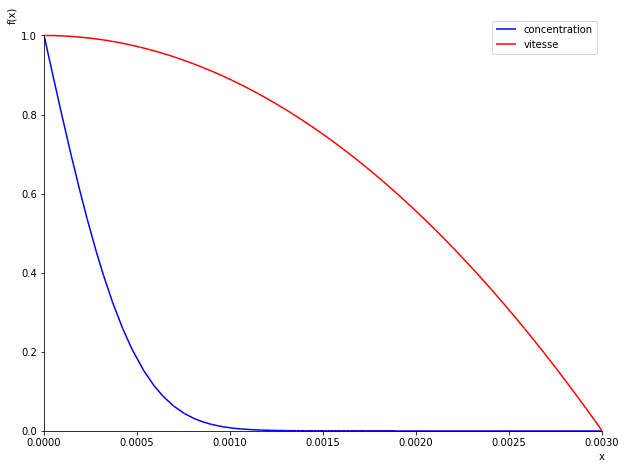

In [44]:
#
# On pourrait maintenant voir l'effet des paramètres sur le profil 
# afin de comparer avec la figure 18.5-1
#
# Valeurs estimées des paramètres en utilisant la diffusivité de l'hélium dans l'eau, c'est 
# un tout petit atome qui diffusera donc très rapidement
#
dico={'D_AB':7e-9,'V_m':.1} 
Cplot=phi.rhs.subs(dico)
delta=0.003                          # film de 3 millimètres, essayez de varier la position z pour voir
Vzplot=1-x**2/delta**2               # la combinaison profil de concentration-profil de vitesse
#                                      comme sur la figure 18.5-1.
#                                      La simplification v=v_max est-elle justifiée???
#
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,8
p=sp.plot((Cplot.subs(z,1),(x,0,delta)),(Vzplot,(x,0,delta)),show=False,legend=True)
p[0].line_color='blue'
p[0].label='concentration'
p[1].line_color='red'
p[1].label='vitesse'
p.show()